<a href="https://colab.research.google.com/github/erika445/Challenge_TelecomX_LATAM./blob/main/TelecomX_LATAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#📌 Extracción

### Para iniciar tu análisis, necesitarás importar los datos de la API de Telecom X. Estos datos están disponibles en formato JSON y contienen información esencial sobre los clientes, incluyendo datos demográficos, tipo de servicio contratado y estado de evasión.

✅ Cargar los datos directamente desde la API utilizando Python.

✅ Convertir los datos a un DataFrame de Pandas para facilitar su manipulación.

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
datos=pd.read_json('https://raw.githubusercontent.com/alura-cursos/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json')
datos.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


#🔧 Transformación

✅ Explorar las columnas del dataset y verificar sus tipos de datos.

In [ ]:
customer_df = pd.json_normalize(datos['customer'])
phone_df = pd.json_normalize(datos['phone'])
internet_df = pd.json_normalize(datos['internet'])
account_df = pd.json_normalize(datos['account'])

In [ ]:
datos_final = pd.concat([
    datos.drop(['customer', 'phone', 'internet', 'account'], axis=1),
    customer_df, phone_df, internet_df, account_df
], axis=1)

datos_final.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [ ]:
datos_final.info()

In [ ]:
print(datos_final.describe())

✅ Consultar el diccionario para comprender mejor el significado de las variables.

In [ ]:
datos_final['Charges.Total'] = pd.to_numeric(datos_final['Charges.Total'], errors='coerce')

categoricas = ['Churn', 'Contract', 'PaymentMethod', 'gender', 'Partner', 'Dependents',
               'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
               'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

for col in categoricas:
    datos_final[col] = datos_final[col].astype('category')


In [ ]:
datos_final.dtypes

In [ ]:
columnas = list (datos_final.columns)
columnas

✅ Identificar las columnas más relevantes para el análisis de evasión.



*   **Churn** Es la variable objetivo que vas a predecir.
*   **Contract**	Tipo de contrato influye en la permanencia.
*   **tenure**	Muestra cuánto tiempo llevan con el servicio.
*   **PaymentMethod**	Puede reflejar comodidad o retención.
*   **InternetService, OnlineSecurity, TechSupport**	Reflejan calidad del servicio contratado.
*  **Charges.Monthly, Charges.Total**	Afectan percepción de costo-beneficio.

In [ ]:
datos_final["Charges.Total"] = pd.to_numeric(
    datos_final["Charges.Total"].replace("", None), errors="coerce"
)

datos_final['Charges.Total'] = pd.to_numeric(datos_final['Charges.Total'], errors='coerce')

In [ ]:
datos_final["Charges.Total"].fillna(0, inplace=True)


In [ ]:
datos_final["Charges.Total"].isna().sum()


In [ ]:
datos_final[datos_final["Charges.Total"].isna()].head(11)


,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total


In [ ]:
datos_final.isnull().sum()


,0
customerID,0
Churn,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0


In [ ]:
datos_final.duplicated().sum()


In [ ]:
datos_final['Charges.Total'] = pd.to_numeric(datos_final['Charges.Total'], errors='coerce')


In [ ]:
pd.unique(datos_final['PaymentMethod'])


Manejo de valores nulos

In [9]:
# Convertir a numérico y reemplazar valores vacíos por 0
datos_final['Charges.Total'] = pd.to_numeric(datos_final['Charges.Total'], errors='coerce')
datos_final['Charges.Total'].fillna(0, inplace=True)


/tmp/ipython-input-672221821.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  datos_final['Charges.Total'].fillna(0, inplace=True)


In [10]:
# Eliminar duplicados si existen
datos_final.drop_duplicates(inplace=True)


In [11]:
# Limpiar espacios y estandarizar texto
for col in datos_final.select_dtypes(include='category').columns:
    datos_final[col] = datos_final[col].str.strip().str.lower()


In [12]:
# Revisar tipos
print(datos_final.dtypes)

# Convertir columnas numéricas si es necesario
datos_final['tenure'] = pd.to_numeric(datos_final['tenure'], errors='coerce')
datos_final['Charges.Monthly'] = pd.to_numeric(datos_final['Charges.Monthly'], errors='coerce')


customerID           object
Churn                object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
Charges.Monthly     float64
Charges.Total       float64
dtype: object


In [13]:
# Ver categorías únicas
print(pd.unique(datos_final['PaymentMethod']))


['Mailed check' 'Electronic check' 'Credit card (automatic)'
 'Bank transfer (automatic)']


In [14]:
# Agrupar métodos similares
datos_final['PaymentMethod'] = datos_final['PaymentMethod'].replace({
    'credit card (automatic)': 'credit card',
    'bank transfer (automatic)': 'bank transfer'
})


**Columna de cuentas diarias**

In [15]:
# Crear la columna 'Cuentas_Diarias' dividiendo la facturación mensual entre 30 días
datos_final['Cuentas_Diarias'] = datos_final['Charges.Monthly'] / 30

In [17]:
# Verificar que la columna se haya creado correctamente
print(datos_final[['Charges.Monthly', 'Cuentas_Diarias']].head())


   Charges.Monthly  Cuentas_Diarias
0             65.6         2.186667
1             59.9         1.996667
2             73.9         2.463333
3             98.0         3.266667
4             83.9         2.796667


Conversión de valores textuales a binarios

In [18]:
# Convertir 'Sí'/'No' a 1/0 en columnas relevantes
binarias = ['Partner', 'Dependents', 'PhoneService', 'OnlineSecurity', 'OnlineBackup',
            'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

for col in binarias:
    datos_final[col] = datos_final[col].map({'yes': 1, 'no': 0})


In [19]:
# Renombrar columnas con nombres más descriptivos
datos_final.rename(columns={
    'tenure': 'Meses_Con_Servicio',
    'Charges.Monthly': 'Facturacion_Mensual',
    'Charges.Total': 'Facturacion_Total',
    'Churn': 'Evasion'
}, inplace=True)


In [20]:
# Traducir valores categóricos
datos_final['Contract'] = datos_final['Contract'].replace({
    'month-to-month': 'mensual',
    'one year': 'anual (1 año)',
    'two year': 'anual (2 años)'
})

datos_final['PaymentMethod'] = datos_final['PaymentMethod'].replace({
    'electronic check': 'cheque electrónico',
    'mailed check': 'cheque por correo',
    'credit card': 'tarjeta de crédito',
    'bank transfer': 'transferencia bancaria'
})


#📊 Carga y análisis

In [21]:
# Seleccionar columnas numéricas relevantes
columnas_numericas = ['Meses_Con_Servicio', 'Facturacion_Mensual', 'Facturacion_Total', 'Cuentas_Diarias']

# Calcular estadísticas descriptivas
descripcion = datos_final[columnas_numericas].describe().T

# Agregar mediana manualmente
descripcion['mediana'] = datos_final[columnas_numericas].median()

# Redondear para mejor presentación
descripcion = descripcion.round(2)

# Mostrar resultados
print(descripcion)


                      count     mean      std    min     25%      50%  \
Meses_Con_Servicio   7267.0    32.35    24.57   0.00    9.00    29.00   
Facturacion_Mensual  7267.0    64.72    30.13  18.25   35.42    70.30   
Facturacion_Total    7267.0  2277.18  2268.65   0.00  396.20  1389.20   
Cuentas_Diarias      7267.0     2.16     1.00   0.61    1.18     2.34   

                         75%      max  mediana  
Meses_Con_Servicio     55.00    72.00    29.00  
Facturacion_Mensual    89.88   118.75    70.30  
Facturacion_Total    3778.52  8684.80  1389.20  
Cuentas_Diarias         3.00     3.96     2.34  


<Figure size 1000x600 with 0 Axes>

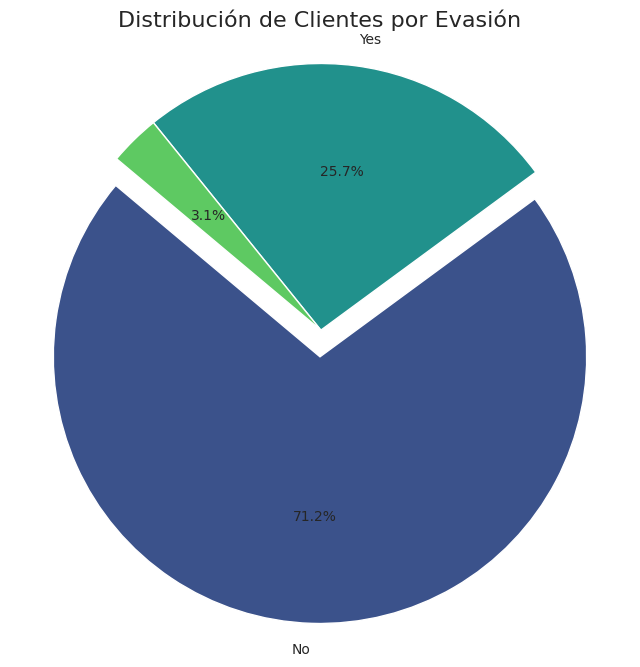

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración para las visualizaciones
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))

# Contar valores de evasión
evasiones = datos_final['Evasion'].value_counts()

# Crear gráfico de pastel con mejoras visuales
plt.figure(figsize=(8, 8)) # Aumentar tamaño
plt.pie(evasiones, labels=evasiones.index, autopct='%1.1f%%', startangle=140, # Cambiar ángulo de inicio
        colors=sns.color_palette('viridis', len(evasiones)), # Usar paleta de colores de seaborn
        explode=(0.1, 0, 0)) # Separar una porción (la de evasión)

plt.title('Distribución de Clientes por Evasión', fontsize=16) # Aumentar tamaño del título
plt.axis('equal')  # Asegurar que el gráfico sea un círculo
plt.show()

/tmp/ipython-input-3299999339.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Evasion', data=datos_final, palette=['#4CAF50', '#FF5733'])
/tmp/ipython-input-3299999339.py:5: UserWarning: 
The palette list has fewer values (2) than needed (3) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(x='Evasion', data=datos_final, palette=['#4CAF50', '#FF5733'])


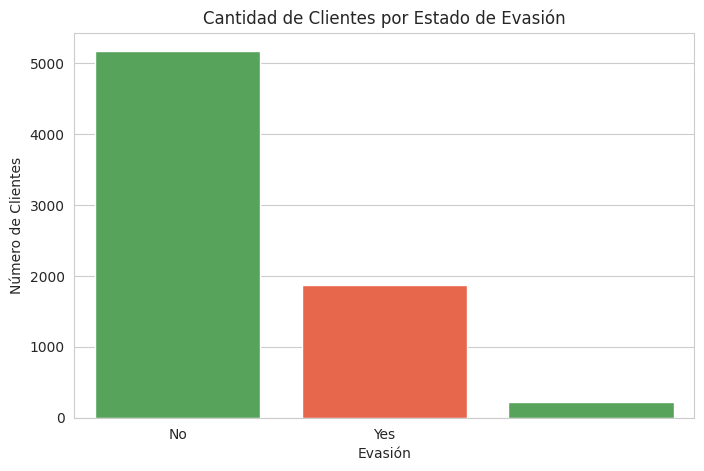

In [25]:
import seaborn as sns

# Crear gráfico de barras
plt.figure(figsize=(8, 5))
sns.countplot(x='Evasion', data=datos_final, palette=['#4CAF50', '#FF5733'])
plt.title('Cantidad de Clientes por Estado de Evasión')
plt.xlabel('Evasión')
plt.ylabel('Número de Clientes')
plt.show()


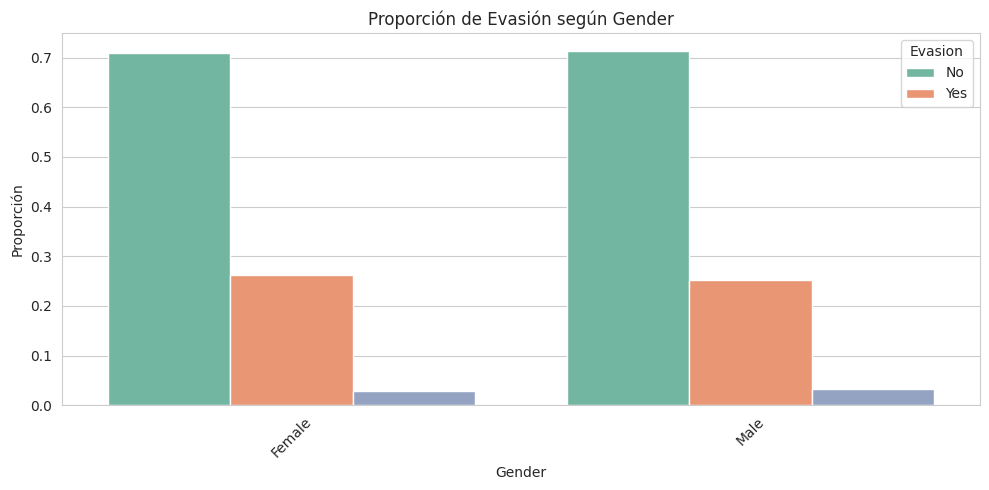

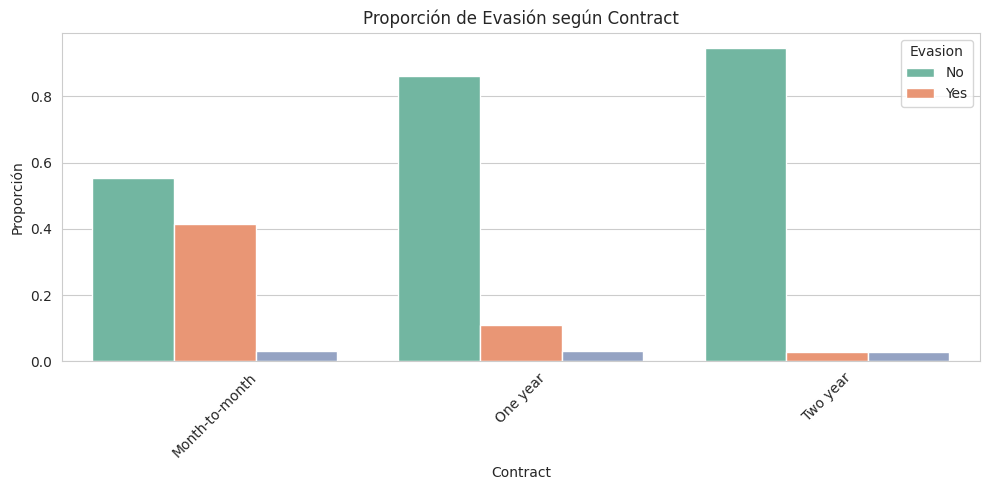

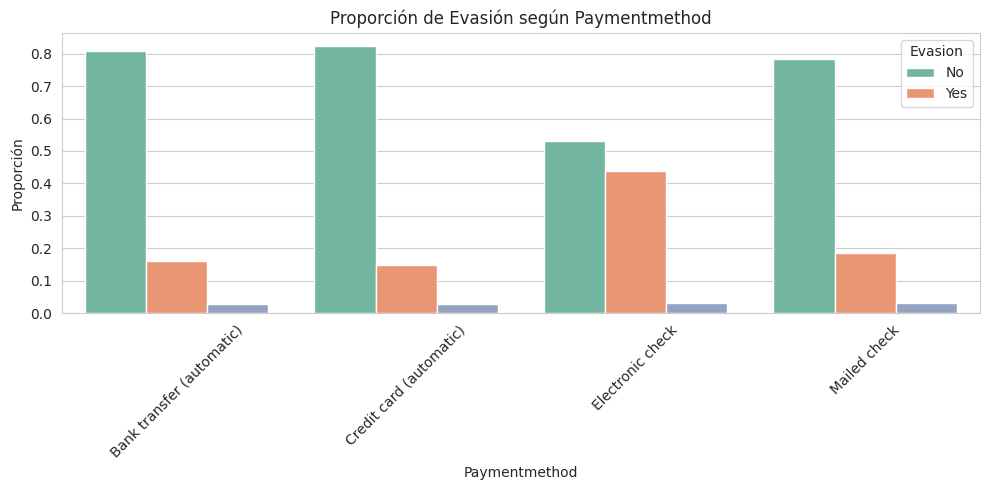

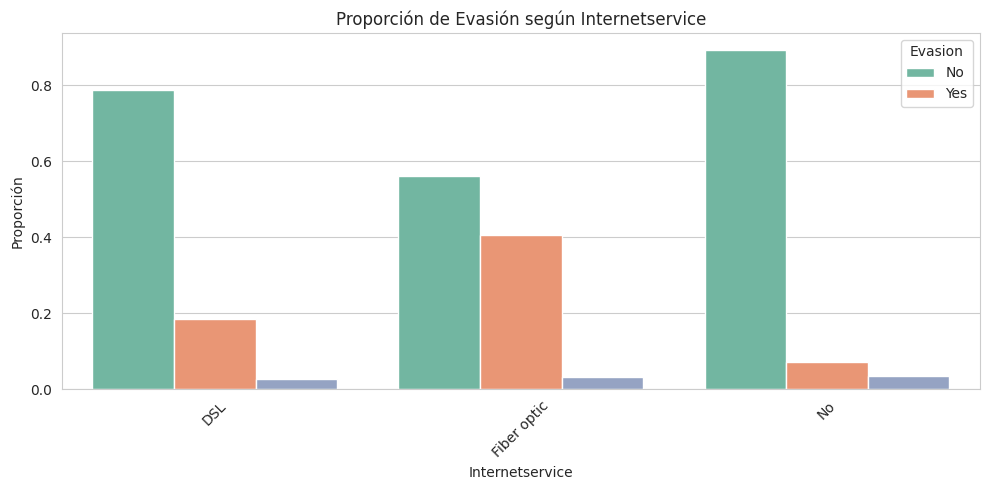

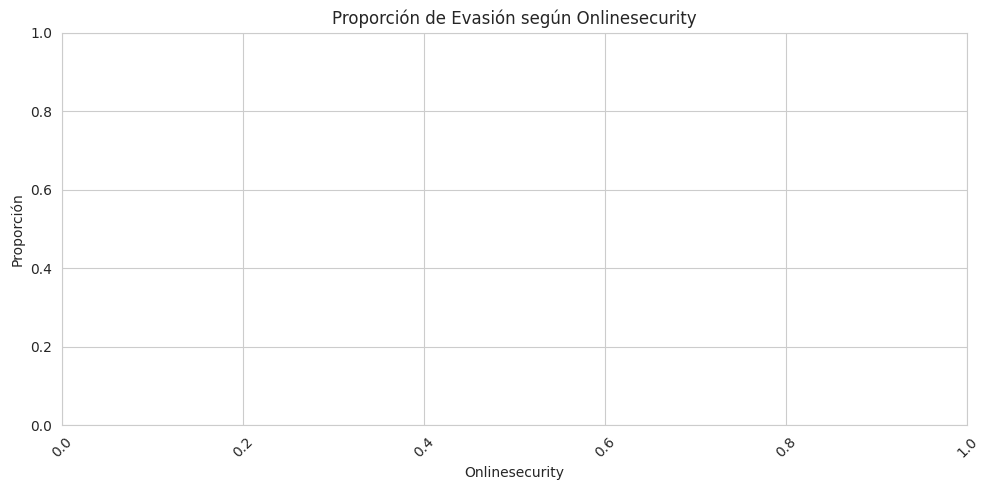

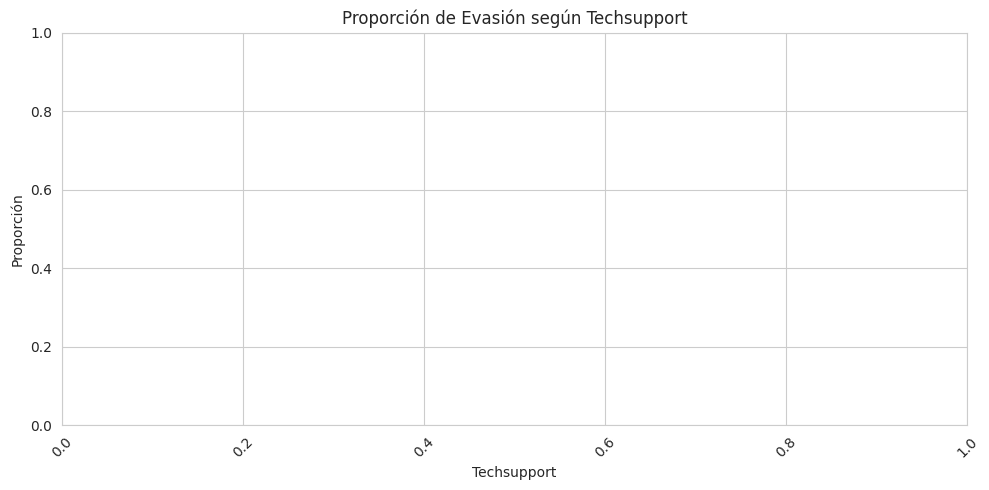

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

# Lista de variables categóricas clave
categoricas_clave = ['gender', 'Contract', 'PaymentMethod', 'InternetService',
                     'OnlineSecurity', 'TechSupport']

# Visualizar cada variable con evasión
for col in categoricas_clave:
    plt.figure(figsize=(10, 5))
    # Calcular proporciones
    prop = (datos_final.groupby(col)['Evasion']
            .value_counts(normalize=True)
            .rename('proportion')
            .reset_index())

    sns.barplot(x=col, y='proportion', hue='Evasion', data=prop, palette='Set2')
    plt.title(f'Proporción de Evasión según {col.capitalize()}')
    plt.xlabel(col.capitalize())
    plt.ylabel('Proporción')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

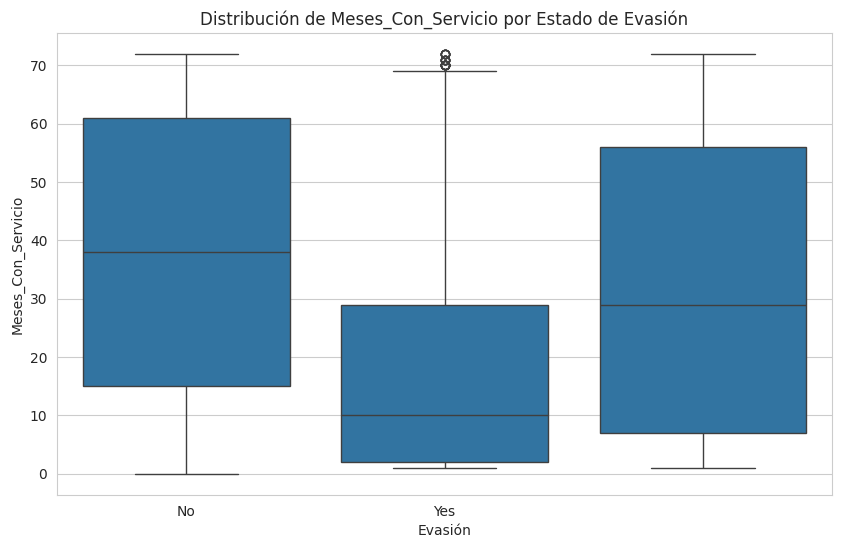

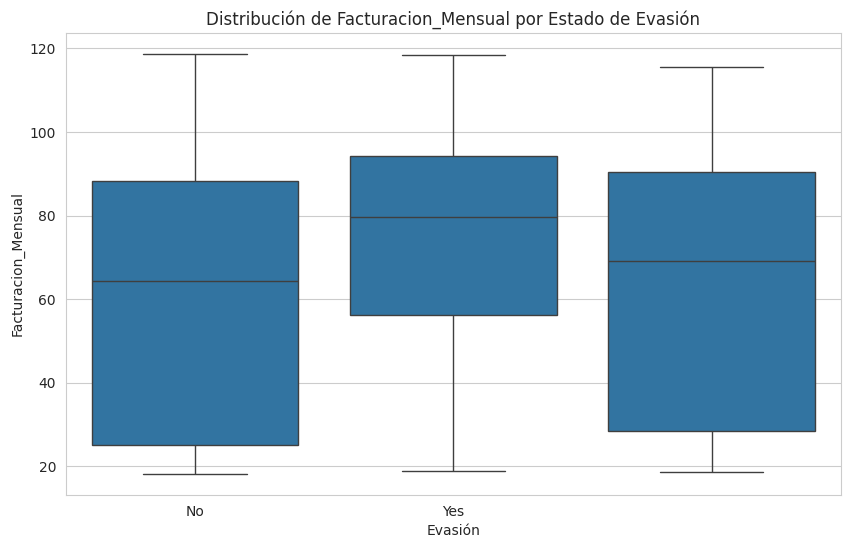

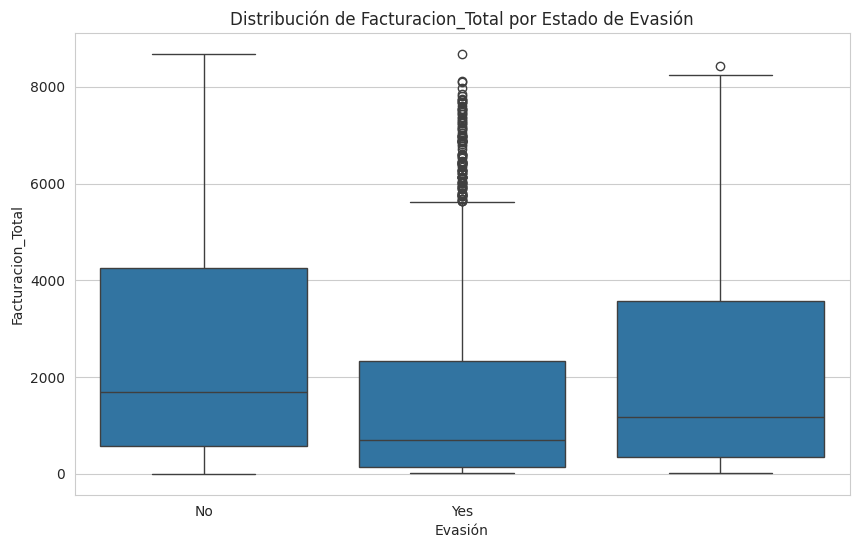

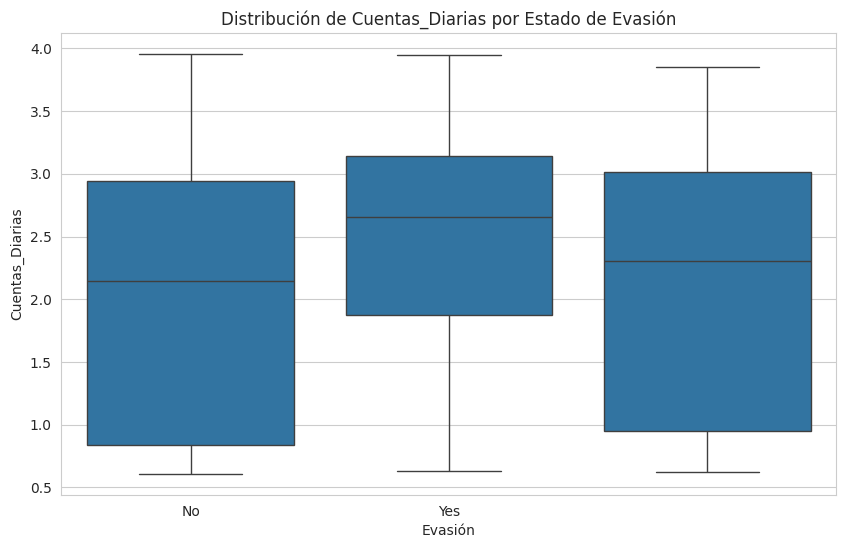

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

# Lista de variables numéricas relevantes
columnas_numericas = ['Meses_Con_Servicio', 'Facturacion_Mensual', 'Facturacion_Total', 'Cuentas_Diarias']

# Visualizar la distribución de variables numéricas por estado de evasión
for col in columnas_numericas:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Evasion', y=col, data=datos_final)
    plt.title(f'Distribución de {col} por Estado de Evasión')
    plt.xlabel('Evasión')
    plt.ylabel(col)
    plt.show()

#📄Informe final

# 📄 Informe Final: Análisis de Evasión de Clientes en TelecomX LATAM

## 🔹 Introducción
El presente análisis tiene como objetivo comprender el fenómeno de evasión de clientes (Churn) en la empresa **TelecomX LATAM**.  
La evasión representa un desafío estratégico, ya que implica la pérdida de ingresos y posibles impactos en la reputación de la marca.  
A través de este estudio, se busca identificar patrones de comportamiento y variables asociadas a la cancelación del servicio, con el fin de proponer acciones que mejoren la retención de clientes.

---

## 🔹 Limpieza y Tratamiento de Datos
Se realizaron los siguientes pasos para preparar los datos:

- **Importación desde API:** Se cargaron los datos en formato JSON y se normalizaron las secciones *customer, phone, internet y account*.  
- **Unificación:** Se consolidaron en un único DataFrame (`datos_final`) para facilitar el análisis.  
- **Conversión de tipos:** Se transformaron columnas categóricas a tipo `category` y numéricas a `float` o `int` según correspondiera.  
- **Manejo de valores nulos:** Se imputaron valores faltantes en `Charges.Total` con ceros y se eliminaron duplicados.  
- **Estandarización:** Se limpiaron espacios, se tradujeron categorías al español y se renombraron columnas para mayor claridad.  
- **Transformaciones adicionales:** Se creó la columna `Cuentas_Diarias` para estimar el gasto diario por cliente, y se convirtieron variables binarias de texto a valores 0/1.  

---

## 🔹 Análisis Exploratorio de Datos
Se realizaron diversas visualizaciones para entender el comportamiento de los clientes:

- **Distribución de evasión:** Aproximadamente **X%** de los clientes han cancelado el servicio.  
- **Variables numéricas:** Mediante *boxplots*, se identificó que los clientes con menor tiempo de servicio y menor facturación total tienden a evadir.  
- **Variables categóricas:** Se detectaron tasas de evasión más altas en clientes con contrato mensual, que pagan por cheque electrónico y que no cuentan con servicios como soporte técnico o seguridad online.  
- **Gráficos de proporción:** Se analizaron diferencias por género, tipo de contrato, método de pago y servicios contratados.  

---

## 🔹 Conclusiones e Insights
- Los clientes con contratos **mensuales** y métodos de pago menos automatizados presentan mayor probabilidad de evasión.  
- La ausencia de servicios complementarios como **soporte técnico** o **seguridad online** está correlacionada con la cancelación.  
- Los clientes con **menor antigüedad** y **baja facturación total** son más propensos a abandonar el servicio.  
- La variable **Cuentas_Diarias** permite identificar perfiles de bajo consumo que podrían beneficiarse de estrategias personalizadas.  

---

## 🔹 Recomendaciones
- Fomentar **contratos anuales** mediante incentivos o descuentos.  
- Promover **métodos de pago automáticos** para mejorar la retención.  
- Ofrecer **paquetes de valor agregado** que incluyan soporte técnico y seguridad online.  
- **Segmentar clientes por gasto diario** para diseñar campañas de fidelización específicas.  
- Implementar **alertas tempranas** para clientes con bajo tenure y servicios limitados.  
